<a href="https://colab.research.google.com/github/shireesha-palakurla/CODSOFT/blob/main/credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Importing libraries and loading the dataset into a Pandas DataFrame.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('/content/creditcard.csv')

In [33]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [34]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


2.Understand the dataset by checking its structure, summary statistics, and class distribution (fraudulent vs. non-fraudulent transactions).

In [35]:
# Check the dataset shape
print(df.shape)
# Check summary statistics
#print(data.describe())
# Check class distribution
print(df['Class'].value_counts())

(7973, 31)
Class
0.0    7947
1.0      25
Name: count, dtype: int64


3.Split the dataset into training and testing sets to evaluate the model’s performance.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4.Train a machine learning model, such as Logistic Regression, on the training data.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
# Create a Logistic Regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

5.Evaluate the model’s performance on the test data using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
# Drop rows with missing values in features or target
df_cleaned = df.dropna(subset=X.columns.tolist() + [y.name])

# Define features (X) and target (y) from the cleaned DataFrame
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1590    2]
 [   0    3]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1592
         1.0       0.60      1.00      0.75         3

    accuracy                           1.00      1595
   macro avg       0.80      1.00      0.87      1595
weighted avg       1.00      1.00      1.00      1595



In [46]:
#Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

###6.Visualizations

### 1.Confusion Matrix Heatmap

To draw a visual comparison between the predicted values and actual values for a binary classification problem like fraud detection, you can create a confusion matrix heatmap or a ROC curve.

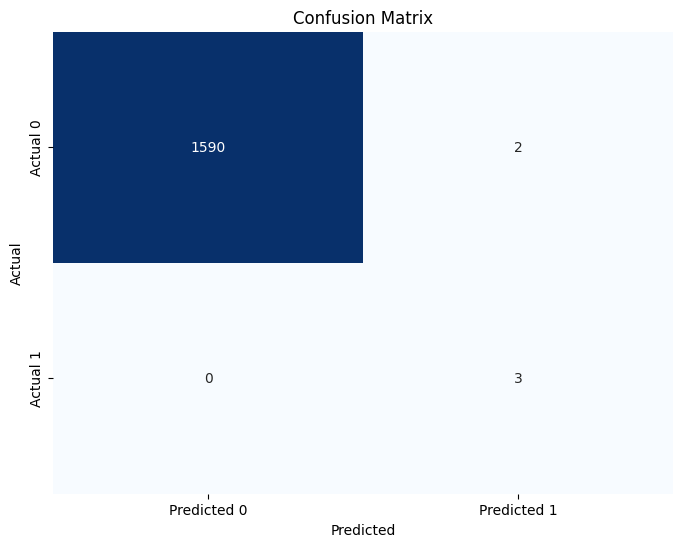

In [47]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Explaining this code:

y_test represents the actual values (ground truth) from the test dataset.
y_pred represents the predicted values from the model.
This code creates a heatmap where the x-axis represents the predicted classes (0 and 1 for non-fraud and fraud, respectively), and the y-axis represents the actual classes. The numbers inside the heatmap cells indicate the count of observations falling into each category. This visualization allows you to easily compare predicted and actual values and see how well your model is performing in terms of true positives, true negatives, false positives, and false negatives.

### 2.ROC curve

To show a Receiver Operating Characteristic (ROC) curve for the credit card fraud detection model, you can use Python libraries like matplotlib and sklearn.

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [49]:
#Train a logistic regression Model and predict with the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


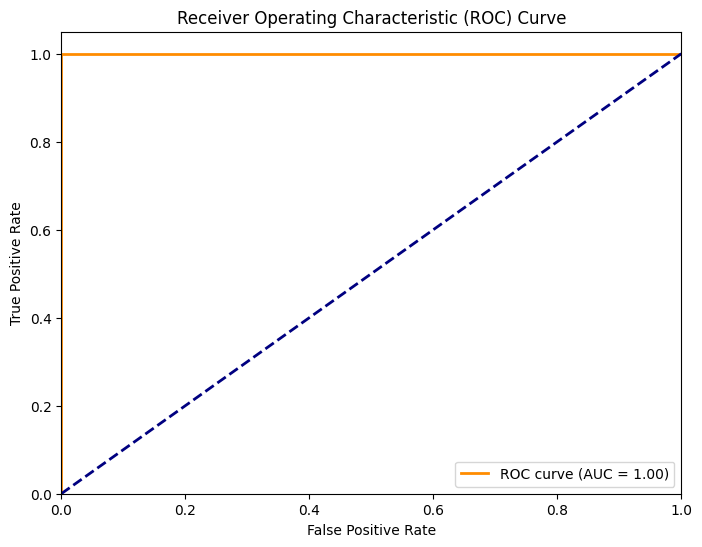

In [50]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Explaining this code:

y_test represents the actual labels (ground truth) from the test dataset.
y_prob represents the predicted probabilities of class 1 (fraudulent) from the model.
The code calculates the ROC curve and the Area Under the Curve (AUC) score and then plots the ROC curve. The ROC curve shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) as we vary the decision threshold. A higher AUC indicates better model performance.

### 3.Precision Recall Curve

To show a Precision-Recall curve for the credit card fraud detection model, we can use Python libraries like matplotlib and sklearn.

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

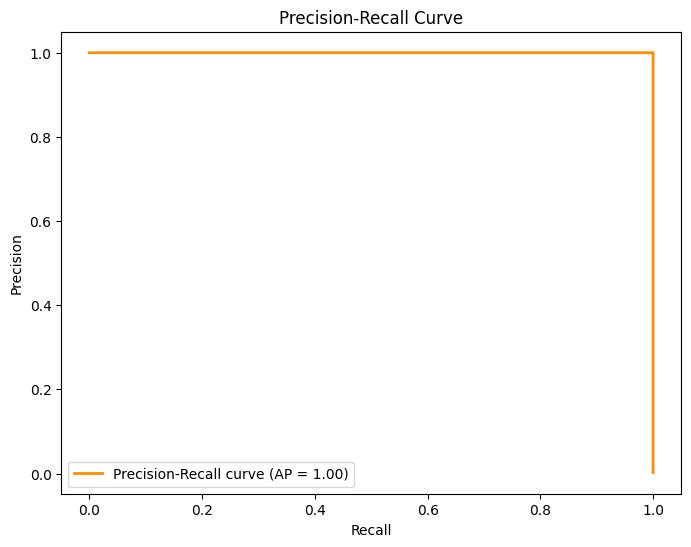

In [52]:
# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
# Calculate Average Precision (AP)
average_precision = average_precision_score(y_test, y_prob)
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Explaining this code:

y_test represents the actual labels (ground truth) from the test dataset.
y_prob represents the predicted probabilities of class 1 (fraudulent) from the model.
The code calculates the Precision-Recall curve and the Average Precision (AP) score and then plots the curve. The Precision-Recall curve shows the trade-off between precision and recall as we vary the decision threshold. A higher AP indicates better model performance.

## Fine-Tuning and Optimization
You can further optimize the model by fine-tuning hyperparameters, trying different algorithms (e.g., Random Forest, Gradient Boosting), and dealing with class imbalance using techniques like oversampling or undersampling.

Once you have a well-performing model, you can deploy it to a production environment for real-time fraud detection. This may involve setting up an API or integrating it into your payment processing system.